In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
titanic_data = pd.read_csv('../data/train.csv')

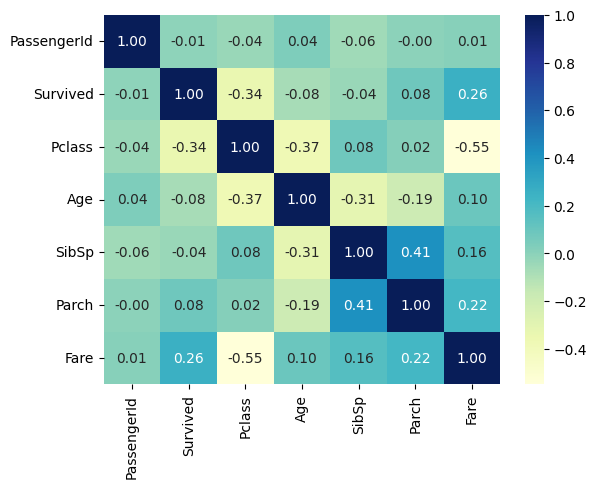

In [3]:
import seaborn as sns
sns.heatmap(titanic_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

# (A) prwto split = stratified shuffle split
### Θελω να σπασω (split) dataset σε train και test (πχ 70/30) και να ανακατεψω (shuffle) ΑΛΛΑ ταυτοχρονα να κρατησω σε 80/20 επιπεδα την μια κατηγορια (stratified). νομιζω default einai 80/20 xwris na tou to peis.

πχ MMMMMMFFFFMMMM -> MFFMMMFMMM + MFMM

εδω με ενδιαφερει το Suruvived Pclass Sex

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split_object = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split_object.split(titanic_data, titanic_data[["Survived"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

## tsekare thn katanomh sygekrimenwn kathgoriwn anamesa sta train kai test sets.
## thaprepe nanai idia se afta ta cats pou evala sto STRATIFIEDSHUFFLESPLIT
## kai PSILOtyxaia stis alles

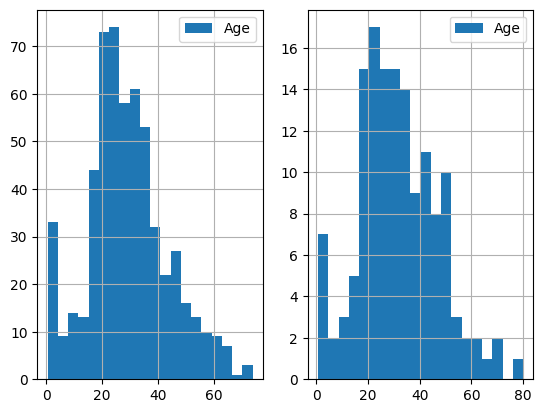

In [5]:
plt.subplot(1,2,1)
strat_train_set["Age"].hist(bins=20, label="Age")
plt.legend()

plt.subplot(1,2,2)
strat_test_set["Age"].hist(bins=20, label="Age")
plt.legend()

plt.show()

# (B) 1 PIPELINE
# ftiaxnw nea classες AgeImputer kai FeatureEncoder.
# giati? ti katafernw me afta?

## AgeImputer = gemizei kena hlikias "Age" me meso oro

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer_instance = SimpleImputer(strategy="mean")
        X['Age'] = imputer_instance.fit_transform(X[['Age']])
        return X

# 2 PIPELINE
## FeatureEncoder = onehot encode se "embarked" kai "gender"

In [7]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    # to idio
    # matrix = numpy array
    # antikathistw 
    
    def transform(self,X):
        encoder_instance = OneHotEncoder()
        matrix_array = encoder_instance.fit_transform(X[["Embarked"]]).toarray()
        
        
        column_names = ["Q", "S", "C", "N"]
        
        
        for i in range(len(matrix_array.T)):
            # flipparw giati thelw gia kathe grammh
            # kai kanonika kathe stoixeio tou array einai sthlh(?)
            # ftiaxnw nees sthles(?) ston X vasei tou kainourgiou pinaka(???)
            X[column_names[i]] = matrix_array.T[i]
            
        
        matrix_array = encoder_instance.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix_array.T)):
            
            # akrivws idio giati ftiaxnw nees
            
            X[column_names[i]] = matrix_array.T[i]
        
        return X

# 3 PIPELINE
## FeatureDropper = twra kanw DROP ta features pou den thelw

In [8]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        # axis = 1 DROP COL
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

# 4 PIPELINE

## ftiaxnw pipeline

In [9]:
from sklearn.pipeline import Pipeline

pipeline_object = Pipeline([("ageimputer", AgeImputer()),
                            ("featureencoder", FeatureEncoder()),
                            ("featuredropper", FeatureDropper())])

### TRAIN <---- pipeline

In [10]:
strat_train_set = pipeline_object.fit_transform(strat_train_set)

# (C) deftero split = input-target X-y (thelw X y data se numpy array)

1. split
2. ftiaxnw scaler mono gia input X
3. fit se X

In [11]:
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

In [12]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,C,Female,Male
547,244,3,22.000000,0,0,7.1250,0.0,0.0,1.0,0.0,1.0
472,114,3,20.000000,1,0,9.8250,0.0,0.0,1.0,1.0,0.0
755,645,3,0.750000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
162,672,1,31.000000,1,0,52.0000,0.0,0.0,1.0,0.0,1.0
327,536,2,7.000000,0,2,26.2500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
655,460,3,29.200175,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
185,760,1,33.000000,0,0,86.5000,0.0,0.0,1.0,1.0,0.0
212,873,1,33.000000,0,0,5.0000,0.0,0.0,1.0,0.0,1.0
732,606,3,36.000000,1,0,15.5500,0.0,0.0,1.0,0.0,1.0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [14]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,C,Female,Male
547,244,3,22.000000,0,0,7.1250,0.0,0.0,1.0,0.0,1.0
472,114,3,20.000000,1,0,9.8250,0.0,0.0,1.0,1.0,0.0
755,645,3,0.750000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
162,672,1,31.000000,1,0,52.0000,0.0,0.0,1.0,0.0,1.0
327,536,2,7.000000,0,2,26.2500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
655,460,3,29.200175,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
185,760,1,33.000000,0,0,86.5000,0.0,0.0,1.0,1.0,0.0
212,873,1,33.000000,0,0,5.0000,0.0,0.0,1.0,0.0,1.0
732,606,3,36.000000,1,0,15.5500,0.0,0.0,1.0,0.0,1.0


# MODEL

1. dialegw
2. KANW FIT_TRANSFORM PANW SE TRAIN DATA X y

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

# list of dictionaries (1 dic)
param_grid = [
    {"n_estimators": [10,100,200,500], 
     "max_depth": [None,5,10], 
     "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [16]:
final_clf = grid_search.best_estimator_

In [17]:
final_clf

RandomForestClassifier(min_samples_split=4)

# efarmwzw transform (data processing) se TEST DATA. ta katharizw/etoimazw gia na ta valw sto model. dhladh vgazw axrhstes sthles, gemizw null koutia klp

In [18]:
strat_test_set = pipeline_object.fit_transform(strat_test_set)

In [19]:
X_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [20]:
final_clf.score(X_data_test, y_data_test)

0.776536312849162

#
# clf = classifier = to montelo
## ok twra exw to modelo(?) kai menei na to perasw apto arxiko dataset gia to final step. to arxiko dataset legetai titanic_data

In [21]:
final_data = pipeline_object.fit_transform(titanic_data)

In [22]:
X_final = final_data.drop(["Survived"], axis=1)
y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [23]:
prod_clf = RandomForestClassifier()

# list of dictionaries (1 dic)
param_grid = [
    {"n_estimators": [10,100,200,500], "max_depth": [None,5,10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [24]:
prod_final_clf = grid_search.best_estimator_

βαζω test.csv

In [25]:
titanic_test_data = pd.read_csv("../data/test.csv")

In [26]:
final_test_data = pipeline_object.fit_transform(titanic_test_data)

In [27]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Q            418 non-null    float64
 7   S            418 non-null    float64
 8   C            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [28]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [37]:
predictions = prod_final_clf.predict(X_data_final_test)

len(predictions)

418

In [40]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])

len(final_df)

418

δημιουργω νεα στηλη "Suvrived" στον final_df

In [47]:
final_df["Survived"] = predictions

final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


σβηνω το index/onomata columns του dataframe

In [48]:
final_df.to_csv("../data/predictions.csv", index=False)

final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
